# Exploratory Data Analysis
### Information: Dataset of crop yields and pesticide usage for different crop varieties across various plots


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tools import *
from math import ceil


## Structure of the dataset

In [56]:
pd.set_option("display.max_columns", None);
pd.set_option('display.max_rows', 50);
data = pd.read_csv("DataSet3.txt", sep=";", index_col="parcelle");

In [57]:
# translate to english
data.index.name = "plot"
data = data.rename({'variete': 'variety', 'rdt': 'yield'}, axis=1)
data['phyto'] = data['phyto'].replace({'Avec': 'with', 'Sans': 'without'})

In [58]:
data.head(30)

,variety,phyto,yield
plot,,,
1,V1,with,5652
2,V1,with,5583
3,V1,with,5612
4,V1,with,5735
5,V1,with,5704
6,V1,with,5544
7,V1,with,5563
8,V1,with,5610
9,V1,with,5641


**Description of features**
- Plot: A unique identifier for each plot in the study
- Variety: The type or variety of crop grown in each plot
- Phyto: A measure of the application of phytopharmaceutical products (e.g., pesticides, herbicides) in each plot, indicating the amount or frequency of use
- Yield: The crop yield in each plot

In [59]:
print('Dimensions: ', data.shape)
#Very small dataset

Dimensions:  (80, 3)


In [60]:
data.dtypes

variety    object
phyto      object
yield       int64
dtype: object

Let's split the features into 2 lists for easier plotting :
- **Numerical** (`num_col`) : continuous features or discrete features with many unique values 
- **Categorical** (`cat_col`) : nominal features, ordinal features or discrete features with few unique values 

In [61]:
nominal_col = list(data.select_dtypes('O').columns)
non_nominal_col = list(data.select_dtypes(np.number).columns)

# Ordinal or discrete with few unique values
low_cardinality_num = []

print('Numerical columns:',num_col)
print('Categorical columns:')
for i in cat_col:
    print(i,data[i].unique(),sep=':\n',end='\n\n')

Numerical columns: ['yield']
Categorical columns:
variety:
['V1' 'V2' 'V3' 'V4']

phyto:
['with' 'without']



In [62]:
data['yield'].nunique()

76

## Checking missing values

In [63]:
data.isna().any()

variety    False
phyto      False
yield      False
dtype: bool

## Stats / Visualization

In [64]:
data.describe()

,yield
count,80.000000
mean,5608.675000
std,155.214492
min,5268.000000
25%,5482.500000
50%,5606.000000
75%,5718.000000
max,5947.000000


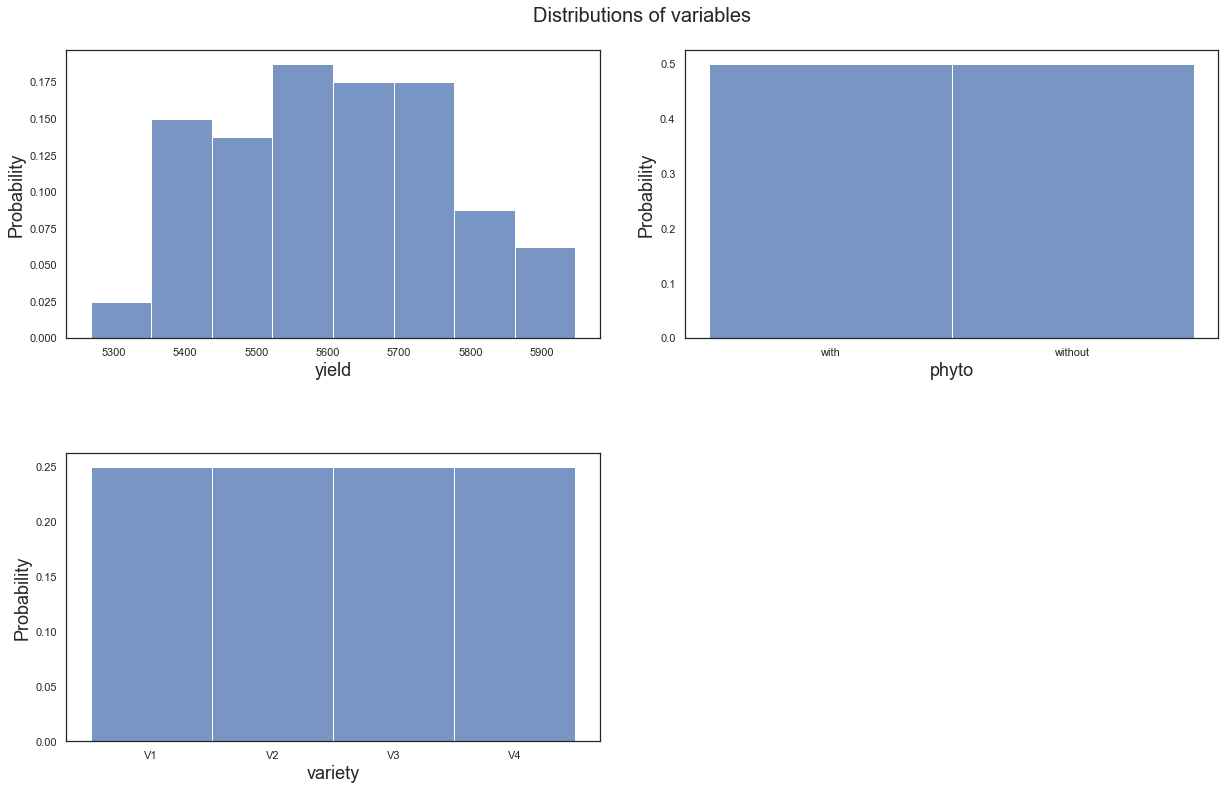

In [65]:
fig1 = distribution(data, ["yield","phyto","variety"])
fig1.suptitle("Distributions of variables", fontsize=20, y=0.95)
plt.show()

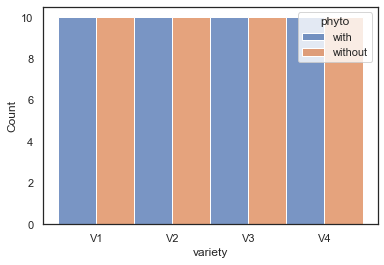

In [66]:
sns.histplot(data=data, x="variety", hue="phyto",  multiple="dodge")
plt.show()

- Yield distribution already almost normal.
- Equal number of plants for each variety, and as many plants having received plant protection products as plants not having received them (globally but also within each variety).

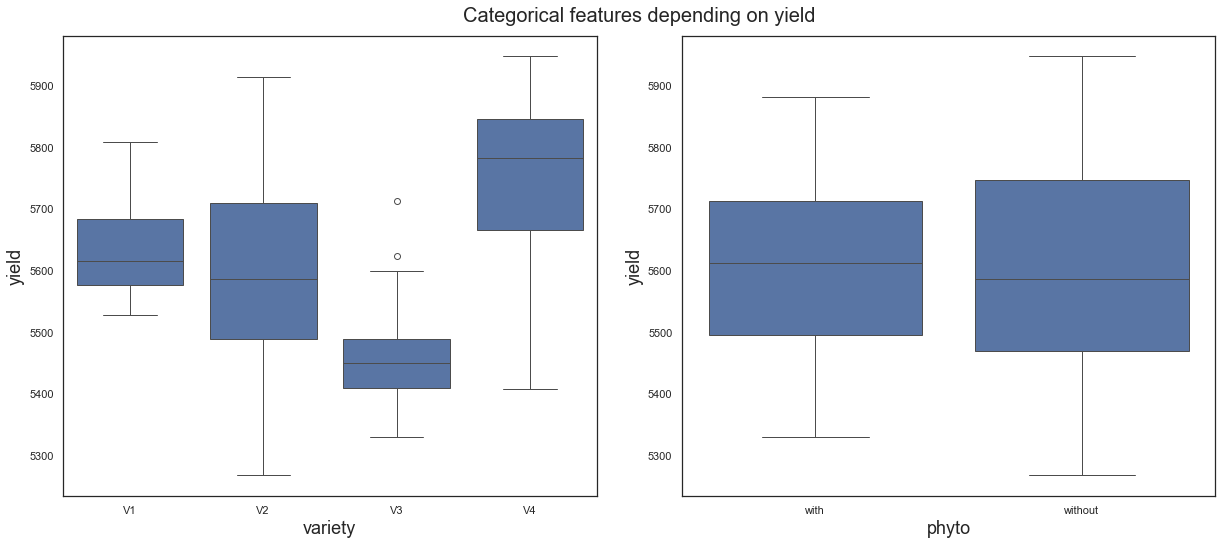

In [67]:
fig2 = cat_plot(data, cat_col, "yield", "regression")
fig2.suptitle("Categorical features depending on yield", fontsize=20, y=0.95)
plt.show()

• Plant variety seems to have a huge influence on yield.

- Variety 3 has a much lower yield than the other varieties and doesn't even have an outlier that reaches the median of variety 4, so it clearly limits yield.
- Variety 1 has yield values that are not bad, and above all well concentrated within a certain range of values, like variety 3 but with higher values.
- Variety 4 generally has a much better yield than the others, but its values can be quite low.
- Variety 2 has average yield values, but they vary enormously (wide range).
--> If a plant belongs to varieties 1 and 3, we can make a fairly accurate rough estimate of its yield. For other varieties, it's trickier without + info

• The use of plant protection products does not seem to have much influence on average yield. The median is slightly higher, but the average should be looked at. 
- On the other hand, plants that receive no plant protection products vary more than plants with, some being more profitable than any plant with, or less profitable than any plant with. This seems consistent, as phytopharmaceuticals ensure that the plant has a good yield, but are not necessarily ideal for the plant's health. Without products, plants can be less profitable, or with luck and the right genes, much more profitable because without industrial products.

In [68]:
print("Mean with phyto: ", data[data.phyto == "with"]['yield'].mean())
print("Mean without phyto: ", data[data.phyto == "without"]['yield'].mean())

Mean with phyto:  5612.225
Mean without phyto:  5605.125


Average very slightly higher with phyto products

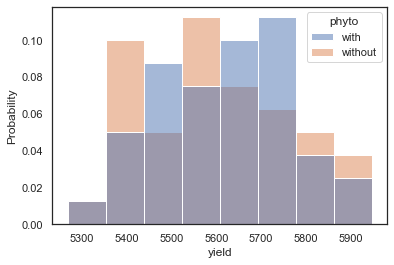

In [69]:
sns.histplot(data=data, x="yield", hue="phyto", stat="probability")
plt.show()

This graph confirms what we saw earlier: plants with phyto are more concentrated in correct yield values than plants without, but less concentrated in very high or low values.

There doesn't seem to be any outlier, except possibly in the yield distribution.

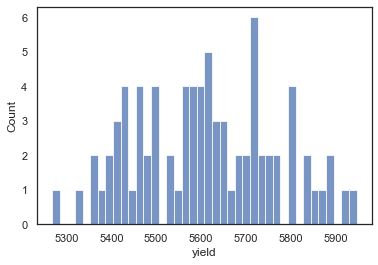

In [70]:
sns.histplot(data=data,x="yield", bins=40)
plt.show()

In [71]:
data.sort_values(by="yield",ascending=True,axis=0).head()

,variety,phyto,yield
plot,,,
38,V2,without,5268
41,V3,with,5330
30,V2,with,5359
58,V3,without,5367
55,V3,without,5371


The discrepancy is significant. Potentially to be eliminated if we want to have a normal distribution of y, but the point is not illogical given that variable 2 has a huge range of values.

Encoding categorical variables:
- phyto : data.phyto = data.phyto.replace({"without":0,"with":1})
- variety : essayer encodage en onehot, leave-one-out, WOE, count..